<a href="https://colab.research.google.com/github/j-datasci/Data_Analytics_W2025/blob/main/DA_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since I'm doing this a week late to catch up after being sick, I didn't spend a lot of time at the end doing extra play. I did, however, have to make some changes to the code since the dataset I downloaded was slightly different than the dataset used in the original code (ie: there was no "price" column in the data file, so I had to do a few different plot analyses, etc.) I worked with pandas pretty extensively last quarter doing a data cleaning project, so I feel pretty good with pandas. I don't necessarily have it memorized, but I at least have a decent idea of what I can do with it. Thanks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [6]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [7]:
df.shape

(11914, 10)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [9]:
df.count()

,0
Make,11914
Model,11914
Year,11914
Engine HP,11845
Engine Cylinders,11884
Transmission Type,11914
Driven_Wheels,11914
highway MPG,11914
city mpg,11914
MSRP,11914


In [10]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
df.count()

,0
Make,10925
Model,10925
Year,10925
Engine HP,10856
Engine Cylinders,10895
Transmission Type,10925
Driven_Wheels,10925
highway MPG,10925
city mpg,10925
MSRP,10925


In [12]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64


In [13]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Make,10827
Model,10827
Year,10827
Engine HP,10827
Engine Cylinders,10827
Transmission Type,10827
Driven_Wheels,10827
highway MPG,10827
city mpg,10827
MSRP,10827


In [14]:
print(df.isnull().sum())   # After dropping the values

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64


<Axes: xlabel='Make'>

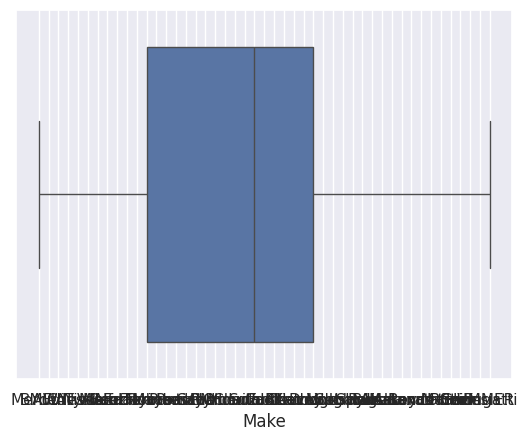

In [16]:
sns.boxplot(x=df['Make'])

<Axes: xlabel='Engine HP'>

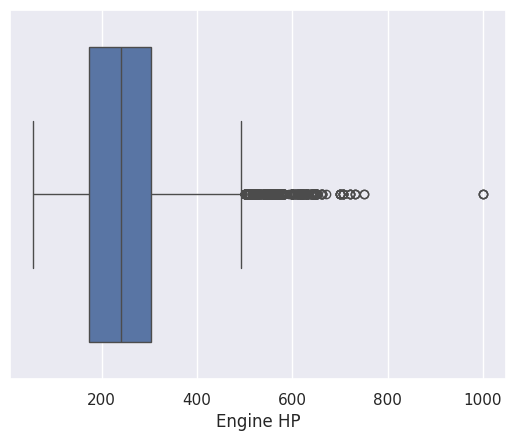

In [18]:
sns.boxplot(x=df['Engine HP'])

<Axes: xlabel='Engine Cylinders'>

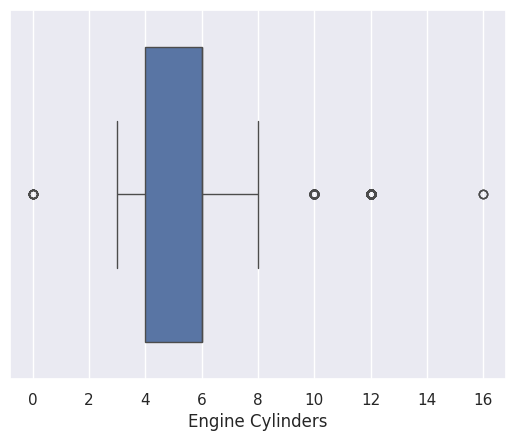

In [19]:
sns.boxplot(x=df['Engine Cylinders'])

In [24]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Year                    9.0
Engine HP             130.0
Engine Cylinders        2.0
highway MPG             8.0
city mpg                6.0
MSRP                21327.5
dtype: float64


In [26]:
# Calculate quantiles and IQR only for numeric columns
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers only in the numeric columns
filtered_df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# If you need the categorical columns back, you can merge or join
# the filtered_df with the original df based on a common index.
# For example, assuming 'index' is a common index column:
final_df = pd.merge(filtered_df, df.drop(numeric_df.columns, axis=1), left_index=True, right_index=True)


# Now 'final_df' should contain your data with outliers removed
# and all original columns
final_df.shape

(9191, 10)

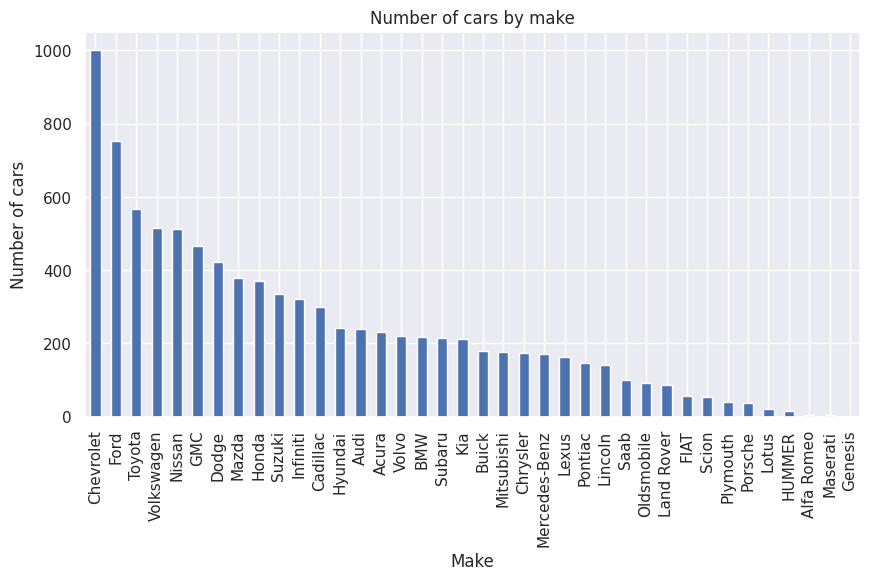

In [27]:
final_df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
Engine HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Engine Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
MSRP,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


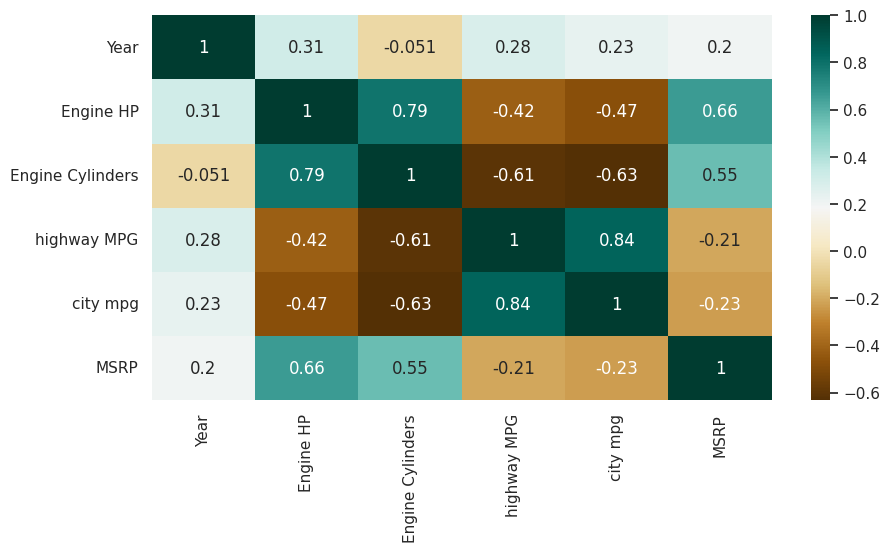

In [32]:
plt.figure(figsize=(10,5))
c= numeric_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

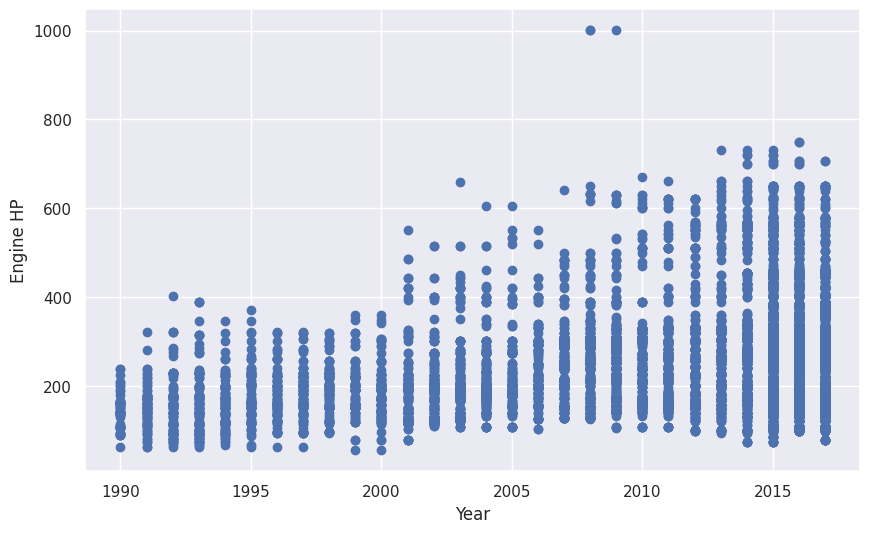

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(numeric_df['Year'], numeric_df['Engine HP'])
ax.set_xlabel('Year')
ax.set_ylabel('Engine HP')
plt.show()